In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Load the uploaded Excel file
file_path = 'combined_averages.xlsx'
#Columnas a comparar
columnas = [    "Abstaylor",
            "Particle-swarp-optimization30-5it","Particle-swarp-optimization50-5it","Particle-swarp-optimization70-5it",
    "Hybrid-sa-pso30-5it",
    "Hybrid-sa-pso50-5it",
    "Hybrid-sa-pso70-5it",]


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':    Problema  Abstaylor  Hybrid-sa-pso30  Hybrid-sa-pso30-5it  Hybrid-sa-pso50  \
  0      chem    2608.92          4348.76              4239.11          5429.88   
  1    chem-1    2744.01          4303.91              4216.72          5261.08   
  2   chembis    1367.06          2163.24              2075.99          2733.06   
  3  dualc5\n     119.51           186.74               123.91           219.76   
  4  dualc8\n     480.74          1677.91               858.21          2513.53   
  
     Hybrid-sa-pso50-5it  Hybrid-sa-pso70  Hybrid-sa-pso70-5it  \
  0              4750.24          6530.78              5349.71   
  1              4787.63          6222.78              5436.93   
  2              2532.91          3332.96              2882.73   
  3               145.05           221.22               149.63   
  4              1191.94          3017.50              1323.23   
  
     Particle-swarp-optimization30  Particle-swarp-opti

In [41]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['chem',
 'chem-1',
 'chembis',
 'dualc5\n',
 'dualc8\n',
 'ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9bis',
 'ex6_1_3',
 'ex6_1_3bis',
 'ex6_2_10',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'ex8_5_1bis',
 'himmel16',
 'hs088\n',
 'hs093\n',
 'hs102\n',
 'hs103\n',
 'hs108\n',
 'hs113\n',
 'launch',
 'mistake\n',
 'odfits\n',
 'sambal']

In [42]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Abstaylor  Particle-swarp-optimization30-5it  \
 0    2608.92                            3812.43   
 1    2744.01                            3753.88   
 2    1367.06                            1988.01   
 3     119.51                             144.16   
 4     480.74                             972.04   
 
    Particle-swarp-optimization50-5it  Particle-swarp-optimization70-5it  \
 0                            4283.67                            4739.26   
 1                            4238.09                            4761.46   
 2                            2300.62                            2529.80   
 3                             152.91                             144.66   
 4                            1115.90                            1231.01   
 
    Hybrid-sa-pso30-5it  Hybrid-sa-pso50-5it  Hybrid-sa-pso70-5it  
 0              4239.11              4750.24              5349.71  
 1              4216.72              4787.63              5436.93  
 2           

In [43]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Particle-swarp-optimization30-5it  \
 0    0.087597                           0.128005   
 1    0.091654                           0.125385   
 2    0.087201                           0.126810   
 3    0.121970                           0.147128   
 4    0.067020                           0.135512   
 5    0.038159                           0.111258   
 6    0.082490                           0.131536   
 7    0.100269                           0.145188   
 8    0.101220                           0.141707   
 9    0.140742                           0.163699   
 10   0.085769                           0.135092   
 11   0.089779                           0.135837   
 12   0.091454                           0.133576   
 13   0.092490                           0.136121   
 14   0.100248                           0.146102   
 15   0.099515                           0.141646   
 16   0.094393                           0.139180   
 17   0.094245                     

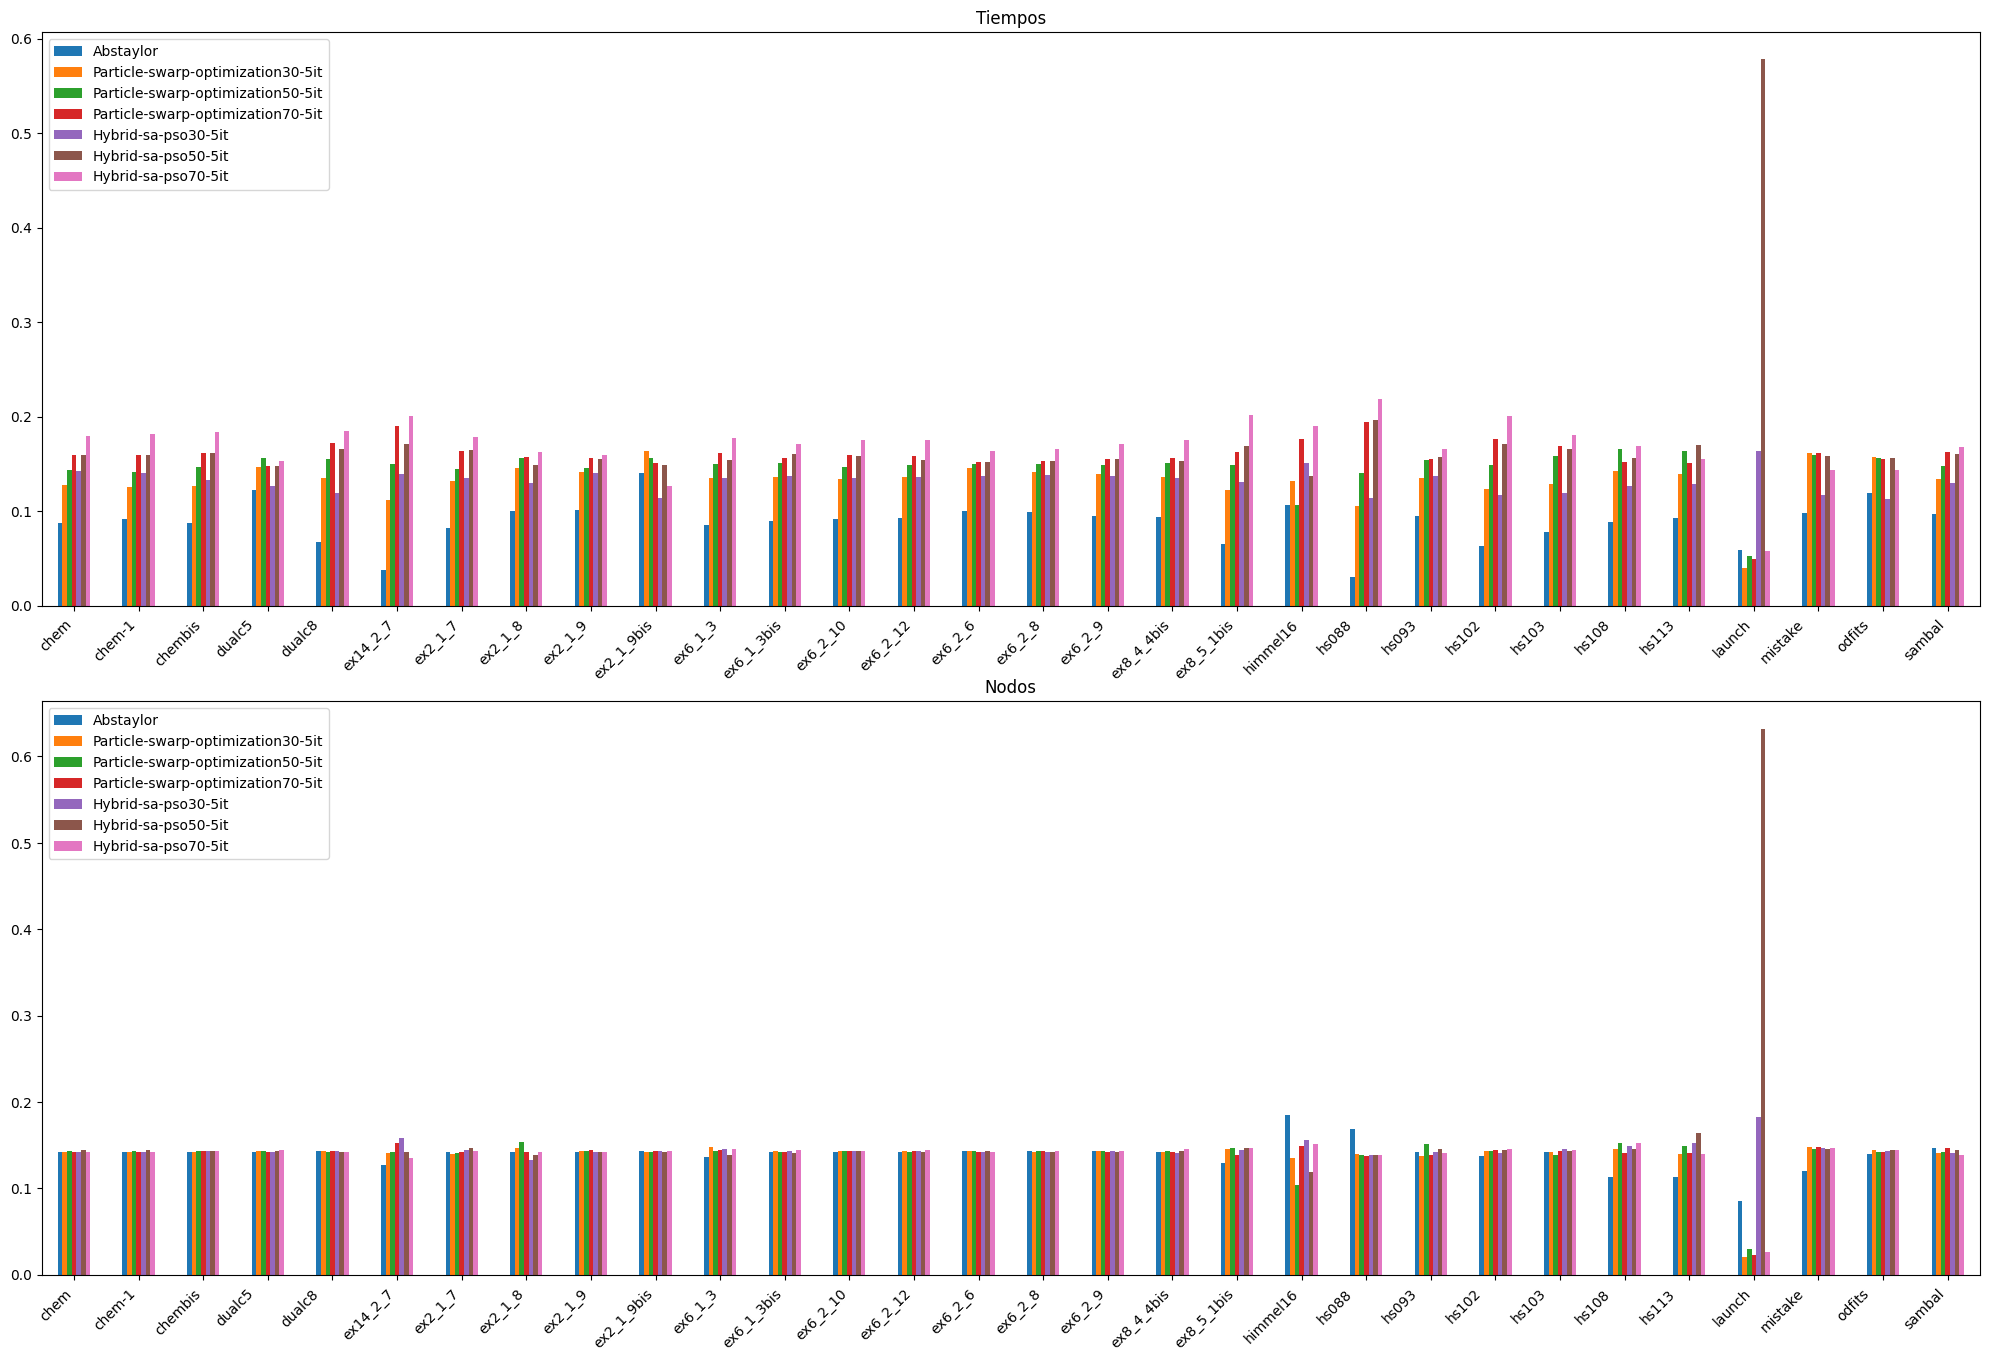

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # Aumenté la altura de la figura

data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Rotar y alinear las etiquetas del eje X
for ax in axs:
    ax.set_xticklabels(problemas, rotation=45, ha='right')
    ax.tick_params(axis='x', which='major', pad=5)  # Aumentar el espacio entre las etiquetas y el eje

# Ajustar el espacio entre los subplots y los bordes de la figura
plt.tight_layout()

# Añadir más espacio en la parte inferior para las etiquetas
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Hybrid-sa-pso50  Hybrid-sa-pso70  Diferencia
 0          0.453978         0.546022    9.204342
 1          0.458128         0.541872    8.374362
 2          0.450552         0.549448    9.889516
 3          0.498345         0.501655    0.331081
 4          0.454442         0.545558    9.111684
 5          0.487673         0.512327    2.465499
 6          0.506548         0.493452   -1.309599
 7          0.482143         0.517857    3.571429
 8          0.478099         0.521901    4.380289
 9          0.498495         0.501505    0.301056
 10         0.475015         0.524985    4.997080
 11         0.499711         0.500289    0.057820
 12         0.448286         0.551714   10.342846
 13         0.506785         0.493215   -1.356932
 14         0.488305         0.511695    2.338955
 15         0.481391         0.518609    3.721833
 16         0.483736         0.516264    3.252806
 17         0.496584         0.503416    0.683186
 18         0.440941         0.559059  

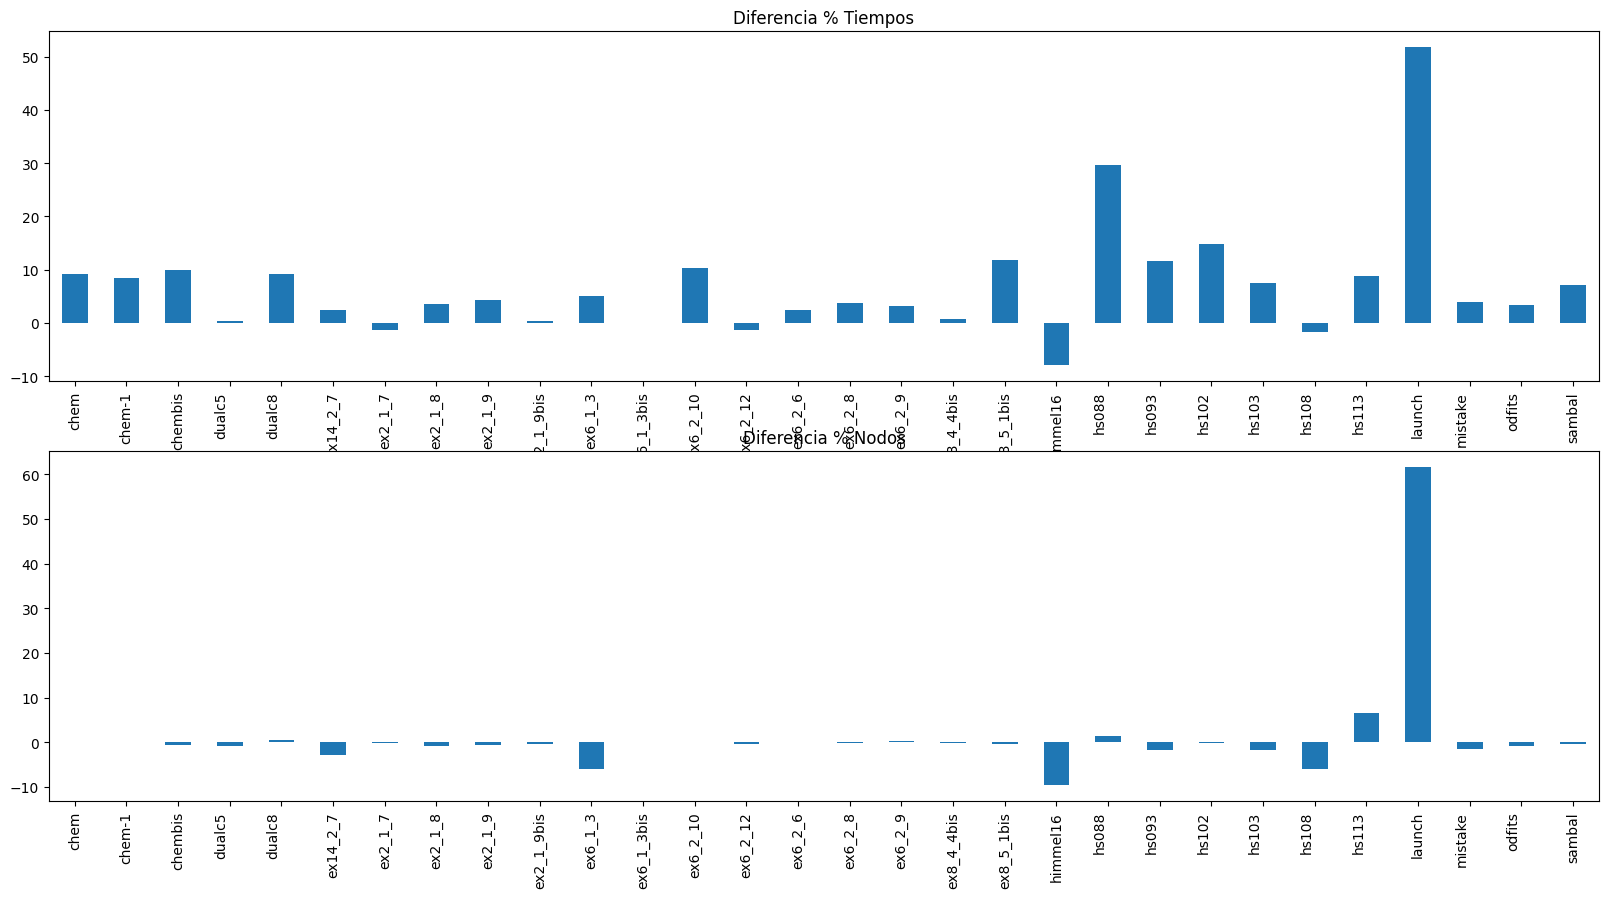

In [ ]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [ ]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': np.float64(7.032440666747029),
 'Nodos': np.float64(1.1678002589047185)}

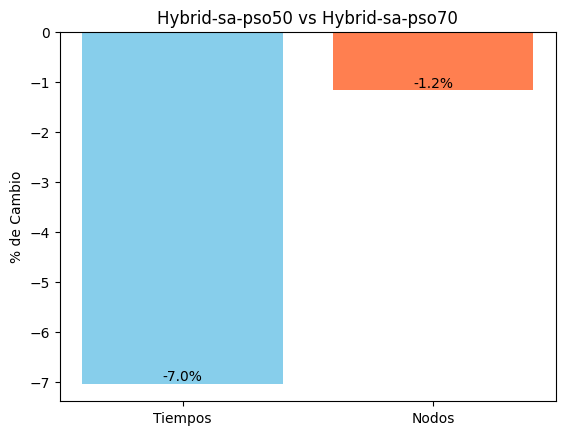

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [ ]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Hybrid-sa-pso50  Hybrid-sa-pso70  Diferencia  Speed Up
 0          0.453978         0.546022    9.204342  0.831429
 1          0.458128         0.541872    8.374362  0.845455
 2          0.450552         0.549448    9.889516  0.820010
 3          0.498345         0.501655    0.331081  0.993400
 4          0.454442         0.545558    9.111684  0.832984
 5          0.487673         0.512327    2.465499  0.951877
 6          0.506548         0.493452   -1.309599  1.026540
 7          0.482143         0.517857    3.571429  0.931034
 8          0.478099         0.521901    4.380289  0.916071
 9          0.498495         0.501505    0.301056  0.993997
 10         0.475015         0.524985    4.997080  0.904815
 11         0.499711         0.500289    0.057820  0.998844
 12         0.448286         0.551714   10.342846  0.812533
 13         0.506785         0.493215   -1.356932  1.027512
 14         0.488305         0.511695    2.338955  0.954290
 15         0.481391         

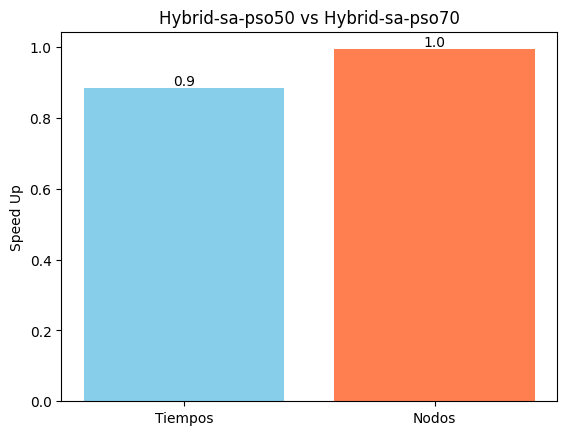

In [ ]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()